# Gradient Decent and MLE
Logistic regression using gradient descent and maximum likelihood estimation (MLE).

In [329]:
# imports 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Sigmoid Function

The sigmoid function takes an input z (which can be any real number), and squashes it into the range (0,1)

This is perfect for binary classification, where we want to interpret the output as the probability of class 1.

In [330]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [331]:
sigmoid(0.8)

np.float64(0.6899744811276125)

In [332]:
# example
# Generate input values
z = np.linspace(-10, 10, 100)
z

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

In [333]:
# get sigmoid outputs 
sig = sigmoid(z)
sig

array([4.53978687e-05, 5.55606489e-05, 6.79983174e-05, 8.32200197e-05,
       1.01848815e-04, 1.24647146e-04, 1.52547986e-04, 1.86692945e-04,
       2.28478855e-04, 2.79614739e-04, 3.42191434e-04, 4.18766684e-04,
       5.12469082e-04, 6.27124987e-04, 7.67413430e-04, 9.39055039e-04,
       1.14904229e-03, 1.40591988e-03, 1.72012560e-03, 2.10440443e-03,
       2.57431039e-03, 3.14881358e-03, 3.85103236e-03, 4.70911357e-03,
       5.75728612e-03, 7.03711536e-03, 8.59898661e-03, 1.05038445e-02,
       1.28252101e-02, 1.56514861e-02, 1.90885420e-02, 2.32625358e-02,
       2.83228820e-02, 3.44451957e-02, 4.18339400e-02, 5.07243606e-02,
       6.13831074e-02, 7.41067363e-02, 8.92170603e-02, 1.07052146e-01,
       1.27951705e-01, 1.52235823e-01, 1.80176593e-01, 2.11963334e-01,
       2.47663801e-01, 2.87185901e-01, 3.30246430e-01, 3.76354517e-01,
       4.24816868e-01, 4.74768924e-01, 5.25231076e-01, 5.75183132e-01,
       6.23645483e-01, 6.69753570e-01, 7.12814099e-01, 7.52336199e-01,
      

<Axes: >

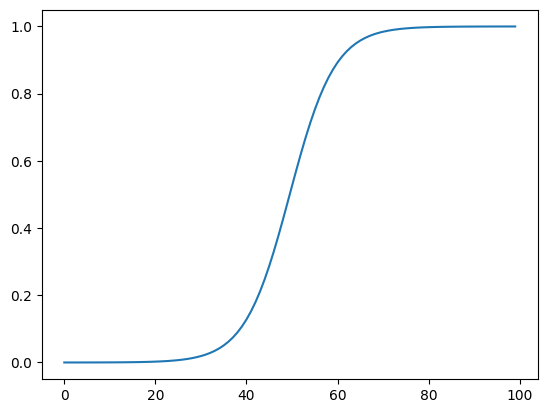

In [334]:
# line plot
sns.lineplot(sig)

## Binary Cross-Entropy (Negative Log-Likelihood) Loss Function

This loss function is used in **binary classification** to measure how well the predicted probabilities match the actual labels.


In [335]:
# Loss function: Negative log-likelihood (binary cross-entropy)
def compute_loss(y, y_pred):
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)  # avoid log(0)
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

# Gradient Descent in Logistic Regression

Gradient Descent is an optimization algorithm used to **minimize a loss function** by iteratively updating model parameters (weights and bias) in the direction that reduces the loss.

---

## The Goal

We want to find parameters **w** and **b** that minimize the loss (e.g., binary cross-entropy):

$$
J(\mathbf{w}, b) = -\frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

Where:

- $\hat{y}_i = \sigma(\mathbf{w}^T \mathbf{x}_i + b)$
- $\sigma$ is the sigmoid function

---

## How It Works

Each iteration of gradient descent updates the weights and bias as:

$$
\mathbf{w} \leftarrow \mathbf{w} - \alpha \cdot \frac{\partial J}{\partial \mathbf{w}}
$$

$$
b \leftarrow b - \alpha \cdot \frac{\partial J}{\partial b}
$$

Where:

- $\alpha$ is the **learning rate**
- $\frac{\partial J}{\partial \mathbf{w}}$, $\frac{\partial J}{\partial b}$ are the gradients


In [336]:
np.zeros(4)

array([0., 0., 0., 0.])

In [337]:
# Gradient descent-based logistic regression
def logistic_regression(X, y, learning_rate=0.1, n_iterations=100):
    
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    losses = []
    weights_history = []

    for i in range(n_iterations):
        
        
        z = np.dot(X, weights) + bias
        
        print("Z",z)
        
        y_pred = sigmoid(z)
        error = y_pred - y
        # print(f"iteration {i}")
        # print("Errors",error)
        # print("weights",weights)
        # print("Bias",bias)
        
        
        dw = np.dot(X.T, error) / n_samples
        db = np.sum(error) / n_samples
        
        
        weights -= learning_rate * dw
        bias -= learning_rate * db
    
        loss = compute_loss(y, y_pred)
        
        losses.append(loss)
        weights_history.append(weights.copy())
        
        if i % 10 == 0:
            loss = compute_loss(y, y_pred)
            print(f"Iteration {i}, Loss: {loss:.4f}")
            print(weights)
            print(bias)
            
    return weights, bias,losses,weights_history

## Prediction Function in Logistic Regression

The `predict` function uses the learned weights and bias to make binary classification decisions based on the logistic regression model.

---

### How It Works:

1. **Linear Combination**:

$$
z = \mathbf{X} \cdot \mathbf{w} + b
$$

2. **Sigmoid Activation** (Probability of class 1):

$$
\hat{y} = \sigma(z) = \frac{1}{1 + e^{-z}}
$$

3. **Thresholding** (Classification Rule):

$$
\text{prediction} =
\begin{cases}
1 & \text{if } \hat{y} \geq 0.5 \\
0 & \text{otherwise}
\end{cases}
$$

In [338]:
# Predict function
def predict(X, weights, bias, threshold=0.5):
    probs = sigmoid(np.dot(X, weights) + bias)
    return (probs >= threshold).astype(int)

## Example: Using Synthetic Data

In [339]:
# Generate binary classification dataset
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, random_state=42)
X

array([[-1.60771127, -0.02939755,  1.56995261, -0.52798442],
       [ 0.29013139,  0.31768126, -0.99651948,  0.47700945],
       [-1.22509603,  0.89591149, -0.90032416,  0.71986083],
       ...,
       [ 0.71079614, -0.61221203,  0.73334515, -0.53058391],
       [ 2.0298423 , -0.41670519, -0.94602592,  0.11203889],
       [-1.30152166,  1.56725458, -2.36166236,  1.5168608 ]],
      shape=(1000, 4))

In [340]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [341]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [342]:
# Train logistic regression model
weights, bias,losses,weights_history = logistic_regression(X_train_scaled, y_train, learning_rate=0.1, n_iterations=3)

Z [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [343]:
# weights 

weights

array([ 0.00017534, -0.06969388,  0.09777121, -0.08937759])

In [344]:
# bias

bias

np.float64(0.0010985489705501211)

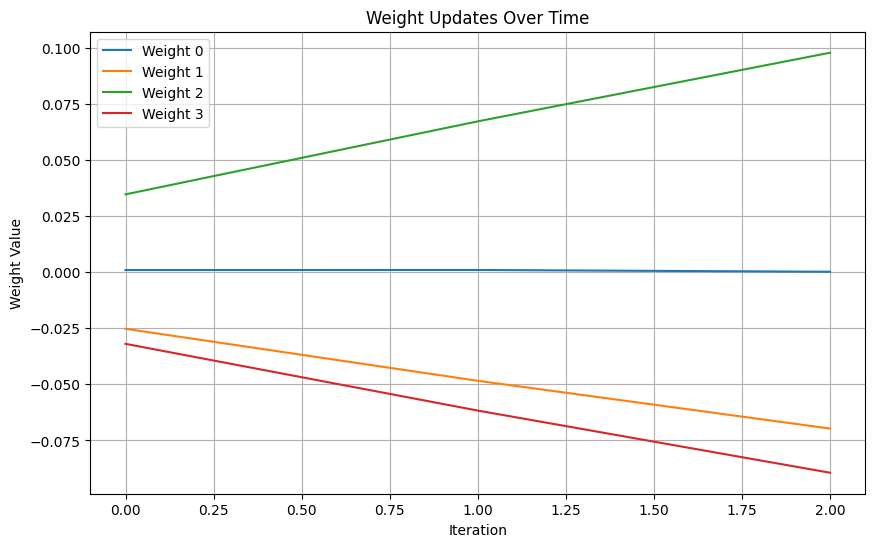

In [345]:
# plot weight histories

weights_history = np.array(weights_history)

plt.figure(figsize=(10, 6))
for i in range(weights_history.shape[1]):
    plt.plot(weights_history[:, i], label=f'Weight {i}')

plt.title('Weight Updates Over Time')
plt.xlabel('Iteration')
plt.ylabel('Weight Value')
plt.legend()
plt.grid(True)
plt.show()

<Axes: >

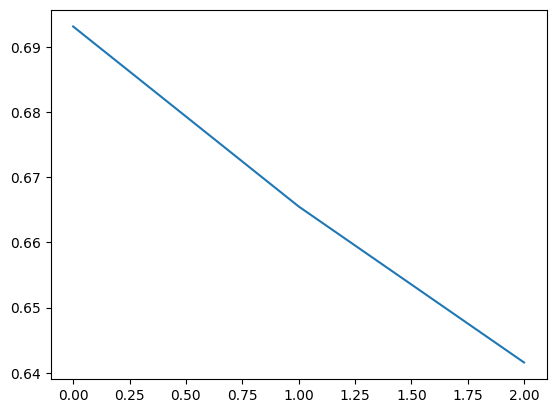

In [346]:
# plot losses 
sns.lineplot(losses)

In [347]:
# Evaluate model on test data
y_pred = predict(X_test_scaled, weights, bias)
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.8400
